<a href="https://colab.research.google.com/github/justin6677/data_science/blob/main/%E6%95%B8%E6%93%9A%E6%9C%9F%E6%9C%ABnewww.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install -q --upgrade keras-cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 13.9 MB/s eta 0:00:00


In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!pip install tensorflow-gpu
!pip install tensorflow

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
import pathlib
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"justin4390542","key":"81b6dfab313a22e36e69b970dd5e8307"}'}

In [ ]:
import tensorflow as tf
from tensorflow import keras
import json
import sys
import keras_cv
import albumentations as A
from albumentations.core.composition import OneOf
from albumentations.augmentations.transforms import *
import cv2

#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'



In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/10LEPW3Di4dhqy_NASZ33G0eagi4w3CS4/view?usp=sharing # Replace the link with your file

Downloading...
From (original): https://drive.google.com/uc?id=10LEPW3Di4dhqy_NASZ33G0eagi4w3CS4
From (redirected): https://drive.google.com/uc?id=10LEPW3Di4dhqy_NASZ33G0eagi4w3CS4&confirm=t&uuid=0b810cb5-6211-4e74-939b-634fcfe5c319
To: /content/Final.zip
100% 12.1M/12.1M [00:00<00:00, 62.0MB/s]


In [ ]:
!unzip Final.zip

Archive:  Final.zip
replace training_data/val/vii/vii_8.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!kaggle datasets download 'shubhamcodez/roman-number110-dataset'

In [ ]:
!mkdir '/content'
!unzip roman-number110-dataset.zip -d '/content'

# Rules

- Submission must have less than 12,000 images combined in training and validation

**Submissions will be evaluated according to two categories:**
1. **Best Performance Overall**
2. **Most Innovative**

In [ ]:
from pathlib import Path
import shutil

In [ ]:
source_folder ="/content/Roman Numerals Dataset/train"
destination_folder ="/content/training_data/train"
subfolders = ["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"]

# 遍歷每個子資料夾
for subfolder in subfolders:
    source_subfolder = os.path.join(source_folder, subfolder)
    destination_subfolder = os.path.join(destination_folder, subfolder)

    # 確保目標子資料夾存在
    os.makedirs(destination_subfolder, exist_ok=True)

    # 遍歷來源子資料夾中的所有檔案
    for file_name in os.listdir(source_subfolder):
        source_path = os.path.join(source_subfolder, file_name)
        destination_path = os.path.join(destination_subfolder, file_name)

        # 移動圖片檔案
        if file_name.endswith((".jpg", ".png", ".jpeg")):  # 可根據需求新增檔案類型
            shutil.move(source_path, destination_path)

print("所有圖片已移動完成!")

In [ ]:
!pip install git+https://github.com/cleanlab/cleanvision.git -qq

In [ ]:
!pip install cleanlab -qq

In [ ]:
from cleanvision.imagelab import Imagelab
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
from cleanlab.filter import find_label_issues

In [ ]:
directory = "/content/"
user_data = directory + "training_data"
test_data = directory + "label_book/" # this can be the label book, or any other test set you create

In [ ]:
imagelab=Imagelab(data_path=user_data + '/train')

In [ ]:
imagelab.visualize(num_images=16)

In [ ]:
imagelab.find_issues()

In [ ]:
imagelab.report()

In [ ]:
imagelab.issue_summary

In [ ]:
exact_dups=imagelab.info['exact_duplicates']['sets']
near_dups=imagelab.info['near_duplicates']['sets']

In [ ]:
padded_data = []
for element in exact_dups:
  padded_element = np.pad(element, (0, len(max(exact_dups, key=len)) - len(element)), 'constant')
  padded_data.append(padded_element)
excat_dups=np.array(padded_data)
padded_data2 = []
for element in near_dups:
  padded_element = np.pad(element, (0, len(max(near_dups, key=len)) - len(element)), 'constant')
  padded_data2.append(padded_element)
near_dups=np.array(padded_data2)

In [ ]:
range(1,len(excat_dups[0]))

In [ ]:
for i in range(len(padded_data)):
  for j in range(1,len(padded_data[i])):
    if os.path.exists(padded_data[i][j]):
      os.remove(padded_data[i][j])
for i in range(len(padded_data2)):
  for j in range(1,len(padded_data2[i])):
    if os.path.exists(padded_data2[i][j]):
      os.remove(padded_data2[i][j])

In [ ]:
ttt=(imagelab.info["odd_aspect_ratio"]["aspect_ratio"]<=0.5)

In [ ]:
for i in range(len(ttt)):
  if ttt[i]==True:
    if os.path.exists(imagelab.info["odd_aspect_ratio"]["aspect_ratio"].index[i]):
      os.remove(imagelab.info["odd_aspect_ratio"]["aspect_ratio"].index[i])

In [ ]:
for o in range(len(imagelab.issues["is_odd_size_issue"])):
  if imagelab.issues["is_odd_size_issue"][o]==True:
    if os.path.exists(imagelab.issues["is_odd_size_issue"].index[o]):
      os.remove(imagelab.issues["is_odd_size_issue"].index[o])

In [ ]:
imagelab_improved=Imagelab(data_path=user_data + '/train')

In [ ]:
imagelab_improved.find_issues()

In [ ]:
imagelab_improved.report()

In [ ]:
imagelab_improved.issue_summary

#print出來找錯誤

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 指定目錄路徑
directory1 = "training_data/train/i"

# 篩選檔案名稱中包含 "_" 的檔案
files_with_underscore = [file for file in os.listdir(directory) if "_" in file]

# 計算行數 (每行 10 張)
num_images = len(files_with_underscore)
num_rows = (num_images + 9) // 10  # 無條件進位

print(f"找到 {num_images} 張圖片名稱包含 '_':")

# 顯示圖片
fig, axes = plt.subplots(num_rows, 10, figsize=(15, 2 * num_rows))
axes = axes.flatten()

for ax, file in zip(axes, files_with_underscore):
    try:
        # 構建完整路徑
        file_path = os.path.join(directory, file)

        # 開啟圖片
        img = Image.open(file_path)

        # 顯示圖片
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(file, fontsize=8)
    except Exception as e:
        print(f"無法顯示圖片 {file}: {e}")

# 隱藏多餘的軸
for ax in axes[num_images:]:
    ax.axis("off")

plt.tight_layout()
plt.show()

找到 5 張圖片名稱包含 '_':
無法顯示圖片 testing_data: [Errno 21] Is a directory: '/content/testing_data'
無法顯示圖片 training_data: [Errno 21] Is a directory: '/content/training_data'
無法顯示圖片 label_book: [Errno 21] Is a directory: '/content/label_book'
無法顯示圖片 sample_submission.csv: cannot identify image file '/content/sample_submission.csv'
無法顯示圖片 sample_data: [Errno 21] Is a directory: '/content/sample_data'


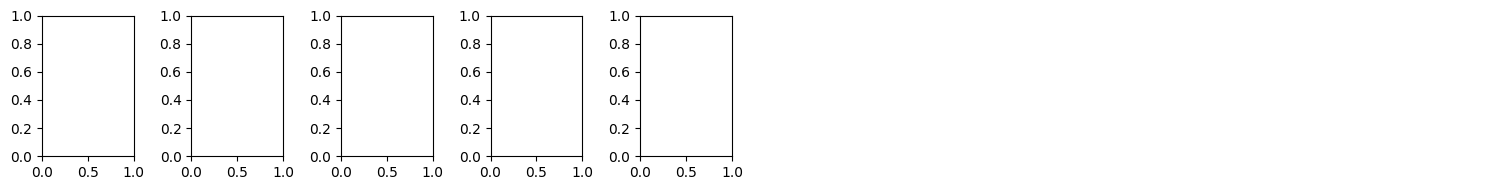

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 指定目錄路徑
directory1 = "training_data/train/i"

# 篩選檔案名稱中包含 "_" 的檔案
files_with_underscore = [file for file in os.listdir(directory) if "_" in file]

# 計算行數 (每行 10 張)
num_images = len(files_with_underscore)
num_rows = (num_images + 9) // 10  # 無條件進位

print(f"找到 {num_images} 張圖片名稱包含 '_':")

# 顯示圖片
fig, axes = plt.subplots(num_rows, 10, figsize=(15, 2 * num_rows))
axes = axes.flatten()

for ax, file in zip(axes, files_with_underscore):
    try:
        # 構建完整路徑
        file_path = os.path.join(directory, file)

        # 開啟圖片
        img = Image.open(file_path)

        # 顯示圖片
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(file, fontsize=8)
    except Exception as e:
        print(f"無法顯示圖片 {file}: {e}")

# 隱藏多餘的軸
for ax in axes[num_images:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


找到 5 張圖片名稱包含 '_':
無法顯示圖片 testing_data: [Errno 21] Is a directory: '/content/testing_data'
無法顯示圖片 training_data: [Errno 21] Is a directory: '/content/training_data'
無法顯示圖片 label_book: [Errno 21] Is a directory: '/content/label_book'
無法顯示圖片 sample_submission.csv: cannot identify image file '/content/sample_submission.csv'
無法顯示圖片 sample_data: [Errno 21] Is a directory: '/content/sample_data'


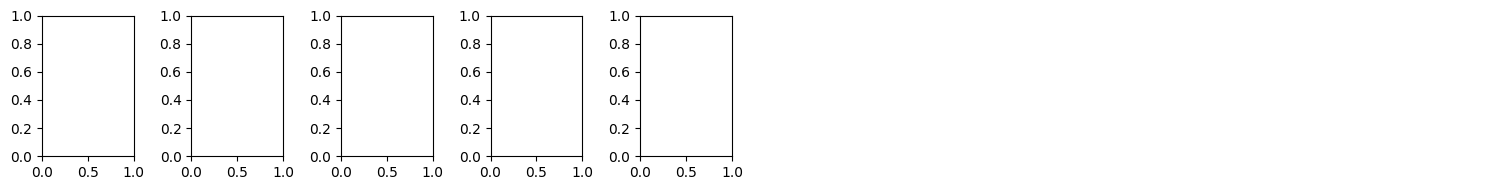

In [ ]:
# 指定目錄路徑
directory_1 = "training_data/train/i"

# 篩選檔案名稱中包含 "_" 的檔案
files_with_underscore = [file for file in os.listdir(directory) if "_" in file]

# 計算行數 (每行 10 張)
num_images = len(files_with_underscore)
num_rows = (num_images + 9) // 10

print(f"找到 {num_images} 張圖片名稱包含 '_':")

# 顯示圖片
fig, axes = plt.subplots(num_rows, 10, figsize=(15, 2 * num_rows))
axes = axes.flatten()

for ax, file in zip(axes, files_with_underscore):
    try:

        file_path = os.path.join(directory, file)# 構建完整路徑


        img = Image.open(file_path).convert("RGB") # 開啟圖片


        ax.imshow(img) # 顯示圖片
        ax.axis("off")
        ax.set_title(file, fontsize=8)
    except Exception as e:
        print(f"無法顯示圖片 {file}: {e}")

# 隱藏多餘的軸
for ax in axes[num_images:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
directory_2 = "training_data/train/ii"

files_with_underscore = [file for file in os.listdir(directory_2) if "_" in file]

num_images = len(files_with_underscore)
num_rows = (num_images + 9) // 10

print(f"找到 {num_images} 張圖片名稱包含 '_':")

fig, axes = plt.subplots(num_rows, 10, figsize=(15, 2 * num_rows))
axes = axes.flatten()

for ax, file in zip(axes, files_with_underscore):
    try:

        file_path = os.path.join(directory_2, file)


        img = Image.open(file_path).convert("RGB")


        ax.imshow(img)
        ax.axis("off")
        ax.set_title(file, fontsize=8)
    except Exception as e:
        print(f"無法顯示圖片 {file}: {e}")


for ax in axes[num_images:]:
    ax.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
directory_3 = "training_data/train/iii"

files_with_underscore = [file for file in os.listdir(directory_3) if "_" in file]

num_images = len(files_with_underscore)
num_rows = (num_images + 9) // 10

print(f"找到 {num_images} 張圖片名稱包含 '_':")

fig, axes = plt.subplots(num_rows, 10, figsize=(15, 2 * num_rows))
axes = axes.flatten()

for ax, file in zip(axes, files_with_underscore):
    try:

        file_path = os.path.join(directory_3, file)


        img = Image.open(file_path).convert("RGB")


        ax.imshow(img)
        ax.axis("off")
        ax.set_title(file, fontsize=8)
    except Exception as e:
        print(f"無法顯示圖片 {file}: {e}")


for ax in axes[num_images:]:
    ax.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
directory_4 = "training_data/train/iv"

files_with_underscore = [file for file in os.listdir(directory_4) if "_" in file]

num_images = len(files_with_underscore)
num_rows = (num_images + 9) // 10

print(f"找到 {num_images} 張圖片名稱包含 '_':")

fig, axes = plt.subplots(num_rows, 10, figsize=(15, 2 * num_rows))
axes = axes.flatten()

for ax, file in zip(axes, files_with_underscore):
    try:

        file_path = os.path.join(directory_4, file)


        img = Image.open(file_path).convert("RGB")


        ax.imshow(img)
        ax.axis("off")
        ax.set_title(file, fontsize=8)
    except Exception as e:
        print(f"無法顯示圖片 {file}: {e}")


for ax in axes[num_images:]:
    ax.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
directory_5 = "training_data/train/v"

files_with_underscore = [file for file in os.listdir(directory_5) if "_" in file]

num_images = len(files_with_underscore)
num_rows = (num_images + 9) // 10

print(f"找到 {num_images} 張圖片名稱包含 '_':")

fig, axes = plt.subplots(num_rows, 10, figsize=(15, 2 * num_rows))
axes = axes.flatten()

for ax, file in zip(axes, files_with_underscore):
    try:

        file_path = os.path.join(directory_5, file)


        img = Image.open(file_path).convert("RGB")


        ax.imshow(img)
        ax.axis("off")
        ax.set_title(file, fontsize=8)
    except Exception as e:
        print(f"無法顯示圖片 {file}: {e}")


for ax in axes[num_images:]:
    ax.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
directory_6 = "training_data/train/vi"

files_with_underscore = [file for file in os.listdir(directory_6) if "_" in file]

num_images = len(files_with_underscore)
num_rows = (num_images + 9) // 10

print(f"找到 {num_images} 張圖片名稱包含 '_':")

fig, axes = plt.subplots(num_rows, 10, figsize=(15, 2 * num_rows))
axes = axes.flatten()

for ax, file in zip(axes, files_with_underscore):
    try:

        file_path = os.path.join(directory_6, file)


        img = Image.open(file_path).convert("RGB")


        ax.imshow(img)
        ax.axis("off")
        ax.set_title(file, fontsize=8)
    except Exception as e:
        print(f"無法顯示圖片 {file}: {e}")


for ax in axes[num_images:]:
    ax.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
directory_7 = "training_data/train/vii"

files_with_underscore = [file for file in os.listdir(directory_7) if "_" in file]

num_images = len(files_with_underscore)
num_rows = (num_images + 9) // 10

print(f"找到 {num_images} 張圖片名稱包含 '_':")

fig, axes = plt.subplots(num_rows, 10, figsize=(15, 2 * num_rows))
axes = axes.flatten()

for ax, file in zip(axes, files_with_underscore):
    try:

        file_path = os.path.join(directory_7, file)


        img = Image.open(file_path).convert("RGB")


        ax.imshow(img)
        ax.axis("off")
        ax.set_title(file, fontsize=8)
    except Exception as e:
        print(f"無法顯示圖片 {file}: {e}")


for ax in axes[num_images:]:
    ax.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
directory_8 = "training_data/train/viii"

files_with_underscore = [file for file in os.listdir(directory_8) if "_" in file]

num_images = len(files_with_underscore)
num_rows = (num_images + 9) // 10

print(f"找到 {num_images} 張圖片名稱包含 '_':")

fig, axes = plt.subplots(num_rows, 10, figsize=(15, 2 * num_rows))
axes = axes.flatten()

for ax, file in zip(axes, files_with_underscore):
    try:

        file_path = os.path.join(directory_8, file)


        img = Image.open(file_path).convert("RGB")


        ax.imshow(img)
        ax.axis("off")
        ax.set_title(file, fontsize=8)
    except Exception as e:
        print(f"無法顯示圖片 {file}: {e}")


for ax in axes[num_images:]:
    ax.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
directory_9 = "training_data/train/ix"

files_with_underscore = [file for file in os.listdir(directory_9) if "_" in file]

num_images = len(files_with_underscore)
num_rows = (num_images + 9) // 10

print(f"找到 {num_images} 張圖片名稱包含 '_':")

fig, axes = plt.subplots(num_rows, 10, figsize=(15, 2 * num_rows))
axes = axes.flatten()

for ax, file in zip(axes, files_with_underscore):
    try:

        file_path = os.path.join(directory_9, file)


        img = Image.open(file_path).convert("RGB")


        ax.imshow(img)
        ax.axis("off")
        ax.set_title(file, fontsize=8)
    except Exception as e:
        print(f"無法顯示圖片 {file}: {e}")


for ax in axes[num_images:]:
    ax.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
directory_10 = "training_data/train/x"

files_with_underscore = [file for file in os.listdir(directory_10) if "_" in file]

num_images = len(files_with_underscore)
num_rows = (num_images + 9) // 10

print(f"找到 {num_images} 張圖片名稱包含 '_':")

fig, axes = plt.subplots(num_rows, 10, figsize=(15, 2 * num_rows))
axes = axes.flatten()

for ax, file in zip(axes, files_with_underscore):
    try:

        file_path = os.path.join(directory_10, file)


        img = Image.open(file_path).convert("RGB")


        ax.imshow(img)
        ax.axis("off")
        ax.set_title(file, fontsize=8)
    except Exception as e:
        print(f"無法顯示圖片 {file}: {e}")


for ax in axes[num_images:]:
    ax.axis("off")

plt.tight_layout()
plt.show()

#移到對應資料夾&刪除白癡資料

In [ ]:
import shutil

# 定義資料夾路徑
base_path = "training_data/train"
label_issues_path_1 = os.path.join(base_path, "i")

correct_labels_1 = {
    "ii": ["i_294.png", "i_235.png", "i_84.png", "i_214.png", "i_62.png", "i_110.png"],
    "iii": ["i_196.png", "i_143.png", "i_347.png", "i_125.png", "i_75.png"],
    "iv": ["i_245.png", "i_378.png"],
    "v": ["i_158.png", "i_60.png", "i_341.png", "i_210.png"],
    "vi": ["i_189.png", "i_243.png"],
    "vii": ["i_41.png", "i_186.png", "i_146.png"],
    "viii": ["i_73.png", "i_57.png", "i_137.png"],
    "ix": ["i_308.png", "i_265.png", "i_249.png"],
    "x": ["i_164.png", "i_385.png", "i_290.png"],
}
delete_images_1 = ["i_32.png", "i_166.png", "i_307.png", "i_2.png", "i_185.png"]


# 1. 移動圖片到正確的資料夾
for label, images in correct_labels_1.items():
    target_folder = os.path.join(base_path, label)  # 每個標籤對應的資料夾
    os.makedirs(target_folder, exist_ok=True)  # 確保目標資料夾存在
    for image in images:
        source_path = os.path.join(label_issues_path_1, image)  # 問題標籤資料夾中的圖片路徑
        target_path = os.path.join(target_folder, image)  # 目標資料夾的路徑
        if os.path.exists(source_path):
            shutil.move(source_path, target_path)
            print(f"Moved {image} to {target_folder}")
        else:
            print(f"Image {image} not found in {source_path}")

# 2. 刪除指定的圖片
for image in delete_images_1:
    image_path = os.path.join(label_issues_path_1, image)  # 問題標籤資料夾中的圖片路徑
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Deleted {image}")
    else:
        print(f"Image {image} not found in {image_path}")

print("處理完成！")

Moved i_294.png to training_data/train/ii
Moved i_235.png to training_data/train/ii
Moved i_84.png to training_data/train/ii
Moved i_214.png to training_data/train/ii
Moved i_62.png to training_data/train/ii
Moved i_110.png to training_data/train/ii
Moved i_196.png to training_data/train/iii
Moved i_143.png to training_data/train/iii
Moved i_347.png to training_data/train/iii
Moved i_125.png to training_data/train/iii
Moved i_75.png to training_data/train/iii
Moved i_245.png to training_data/train/iv
Moved i_378.png to training_data/train/iv
Moved i_158.png to training_data/train/v
Moved i_60.png to training_data/train/v
Moved i_341.png to training_data/train/v
Moved i_210.png to training_data/train/v
Moved i_189.png to training_data/train/vi
Moved i_243.png to training_data/train/vi
Moved i_41.png to training_data/train/vii
Moved i_186.png to training_data/train/vii
Moved i_146.png to training_data/train/vii
Moved i_73.png to training_data/train/viii
Moved i_57.png to training_data/tr

In [ ]:
# 定義正確的標籤對應的圖片清單
label_issues_path_2 = os.path.join(base_path, "ii")
correct_labels_2 = {
    "i": ["ii_165.png", "ii_147.png", "ii_177.png"],
    "ii": [],
    "iii": ["ii_172.png", "ii_140.png", "ii_180.png", "ii_129.png"],
    "iv": ["ii_197.png", "ii_65.png", "ii_276.png"],
    "v": ["ii_121.png"],
    "vi": ["ii_34.png", "ii_221.png", "ii_15.png"],
    "vii": ["ii_83.png", "ii_259.png", "ii_37.png"],
    "viii": ["ii_152.png", "ii_28.png"],
    "ix": ["ii_39.png", "ii_148.png", "ii_242.png"],
    "x": ["ii_122.png", "ii_71.png", "ii_238.png", "ii_128.png"],
}

# 定義要刪除的圖片清單
delete_images_2 = ["ii_32.png", "ii_220.png", "ii_142.png", "ii_229.png"]

# 1. 移動圖片到正確的資料夾
for label, images in correct_labels_2.items():
    target_folder = os.path.join(base_path, label)  # 每個標籤對應的資料夾
    os.makedirs(target_folder, exist_ok=True)  # 確保目標資料夾存在
    for image in images:
        source_path = os.path.join(label_issues_path_2, image)  # 問題標籤資料夾中的圖片路徑
        target_path = os.path.join(target_folder, image)  # 目標資料夾的路徑
        if os.path.exists(source_path):
            shutil.move(source_path, target_path)
            print(f"Moved {image} to {target_folder}")
        else:
            print(f"Image {image} not found in {source_path}")

# 2. 刪除指定的圖片
for image in delete_images_2:
    image_path = os.path.join(label_issues_path_2, image)  # 問題標籤資料夾中的圖片路徑
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Deleted {image}")
    else:
        print(f"Image {image} not found in {image_path}")

print("處理完成！")

Moved ii_165.png to training_data/train/i
Moved ii_147.png to training_data/train/i
Moved ii_177.png to training_data/train/i
Moved ii_172.png to training_data/train/iii
Moved ii_140.png to training_data/train/iii
Moved ii_180.png to training_data/train/iii
Moved ii_129.png to training_data/train/iii
Moved ii_197.png to training_data/train/iv
Moved ii_65.png to training_data/train/iv
Moved ii_276.png to training_data/train/iv
Moved ii_121.png to training_data/train/v
Moved ii_34.png to training_data/train/vi
Moved ii_221.png to training_data/train/vi
Moved ii_15.png to training_data/train/vi
Moved ii_83.png to training_data/train/vii
Moved ii_259.png to training_data/train/vii
Moved ii_37.png to training_data/train/vii
Moved ii_152.png to training_data/train/viii
Moved ii_28.png to training_data/train/viii
Moved ii_39.png to training_data/train/ix
Moved ii_148.png to training_data/train/ix
Moved ii_242.png to training_data/train/ix
Moved ii_122.png to training_data/train/x
Moved ii_71.

In [ ]:
label_issues_path_3 = os.path.join(base_path, "iii")

correct_labels_3 = {
    "i": ["iii_236.png", "iii_92.png", "iii_209.png", "iii_252.png", "iii_140.png"],
    "ii": ["iii_296.png", "iii_59.png", "iii_138.png", "iii_117.png", "iii_94.png", "iii_170.png",
           "iii_127.png", "iii_195.png"],
    "iii": [],
    "iv": ["iii_159.png", "iii_144.png", "iii_228.png"],
    "v": ["iii_86.png", "iii_28.png", "iii_65.png"],
    "vi": ["iii_49.png"],
    "vii": ["iii_31.png", "iii_37.png"],
    "viii": [],
    "ix": ["iii_234.png", "iii_103.png", "iii_242.png"],
    "x": ["iii_17.png", "iii_294.png", "iii_101.png"],
}

delete_images_3 = ["iii_16.png", "iii_9.png", "iii_273.png", "iii_233.png",
                   "iii_222.png", "iii_88.png", "iii_210.png", "iii_225.png",
                   "iii_15.png", "iii_245.png"]

for label, images in correct_labels_3.items():
    target_folder = os.path.join(base_path, label)
    os.makedirs(target_folder, exist_ok=True)
    for image in images:
        source_path = os.path.join(label_issues_path_3, image)
        target_path = os.path.join(target_folder, image)
        if os.path.exists(source_path):
            shutil.move(source_path, target_path)
            print(f"Moved {image} to {target_folder}")
        else:
            print(f"Image {image} not found in {source_path}")


for image in delete_images_3:
    image_path = os.path.join(label_issues_path_3, image)
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Deleted {image}")
    else:
        print(f"Image {image} not found in {image_path}")

print("處理完成！")


Moved iii_236.png to training_data/train/i
Moved iii_92.png to training_data/train/i
Moved iii_209.png to training_data/train/i
Moved iii_252.png to training_data/train/i
Moved iii_140.png to training_data/train/i
Moved iii_296.png to training_data/train/ii
Moved iii_59.png to training_data/train/ii
Moved iii_138.png to training_data/train/ii
Moved iii_117.png to training_data/train/ii
Moved iii_94.png to training_data/train/ii
Moved iii_170.png to training_data/train/ii
Moved iii_127.png to training_data/train/ii
Moved iii_195.png to training_data/train/ii
Moved iii_159.png to training_data/train/iv
Moved iii_144.png to training_data/train/iv
Moved iii_228.png to training_data/train/iv
Moved iii_86.png to training_data/train/v
Moved iii_28.png to training_data/train/v
Moved iii_65.png to training_data/train/v
Moved iii_49.png to training_data/train/vi
Moved iii_31.png to training_data/train/vii
Moved iii_37.png to training_data/train/vii
Moved iii_234.png to training_data/train/ix
Mov

In [ ]:
label_issues_path_4 = os.path.join(base_path, "iv")  # iv資料夾

# 定義正確的標籤對應圖片
correct_labels_4 = {
    "i": ["iv_298.png", "iv_238.png"],
    "ii": ["iv_268.png", "iv_313.png", "iv_52.png", "iv_63.png", "iv_294.png"],
    "iii": ["iv_328.png", "iv_95.png", "iv_406.png"],
    "iv": [],
    "v": ["iv_315.png", "iv_74.png"],
    "vi": ["iv_166.png"],
    "vii": ["iv_206.png", "iv_45.png"],
    "viii": ["iv_310.png", "iv_246.png"],
    "ix": ["iv_273.png"],
    "x": ["iv_106.png"],
}

# 定義要刪除的圖片清單
delete_images_4 = ["iv_228.png", "iv_161.png", "iv_334.png", "iv_254.png",
                   "iv_58.png", "iv_309.png", "iv_255.png", "iv_251.png",
                   "iv_42.png", "iv_43.png", "iv_22.png"]

# 1. 移動圖片到正確的資料夾
for label, images in correct_labels_4.items():
    target_folder = os.path.join(base_path, label)  # 每個標籤對應的資料夾
    os.makedirs(target_folder, exist_ok=True)  # 確保目標資料夾存在
    for image in images:
        source_path = os.path.join(label_issues_path_4, image)  # iv資料夾中的圖片路徑
        target_path = os.path.join(target_folder, image)  # 目標資料夾路徑
        if os.path.exists(source_path):
            shutil.move(source_path, target_path)
            print(f"Moved {image} to {target_folder}")
        else:
            print(f"Image {image} not found in {source_path}")

# 2. 刪除指定的圖片
for image in delete_images_4:
    image_path = os.path.join(label_issues_path_4, image)  # iv資料夾中的圖片路徑
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Deleted {image}")
    else:
        print(f"Image {image} not found in {image_path}")

print("處理完成！")


Moved iv_298.png to training_data/train/i
Moved iv_238.png to training_data/train/i
Moved iv_268.png to training_data/train/ii
Moved iv_313.png to training_data/train/ii
Moved iv_52.png to training_data/train/ii
Moved iv_63.png to training_data/train/ii
Moved iv_294.png to training_data/train/ii
Moved iv_328.png to training_data/train/iii
Moved iv_95.png to training_data/train/iii
Moved iv_406.png to training_data/train/iii
Moved iv_315.png to training_data/train/v
Moved iv_74.png to training_data/train/v
Moved iv_166.png to training_data/train/vi
Moved iv_206.png to training_data/train/vii
Moved iv_45.png to training_data/train/vii
Moved iv_310.png to training_data/train/viii
Moved iv_246.png to training_data/train/viii
Moved iv_273.png to training_data/train/ix
Moved iv_106.png to training_data/train/x
Deleted iv_228.png
Deleted iv_161.png
Deleted iv_334.png
Deleted iv_254.png
Deleted iv_58.png
Deleted iv_309.png
Deleted iv_255.png
Deleted iv_251.png
Deleted iv_42.png
Deleted iv_43.p

In [ ]:
label_issues_path_5 = os.path.join(base_path, "v")  # v資料夾

# 定義正確的標籤對應圖片
correct_labels_5 = {
    "i": ["v_94.png", "v_290.png"],
    "ii": ["v_7.png", "v_307.png", "v_262.png", "v_267.png"],
    "iii": ["v_102.png", "v_29.png"],
    "iv": ["v_143.png", "v_108.png", "v_145.png"],
    "v": [],
    "vi": ["v_274.png", "v_210.png"],
    "vii": ["v_233.png", "v_263.png", "v_17.png"],
    "viii": ["v_46.png", "v_22.png", "v_78.png"],
    "ix": ["v_4.png", "v_201.png", "v_119.png"],
    "x": ["v_101.png", "v_56.png", "v_128.png", "v_249.png"],
}

# 定義要刪除的圖片清單
delete_images_5 = [
    "v_179.png", "v_203.png", "v_84.png", "v_183.png", "v_162.png", "v_289.png",
    "v_319.png", "v_219.png", "v_39.png", "v_48.png", "v_166.png", "v_215.png", "v_60.png"
]

# 1. 移動圖片到正確的資料夾
for label, images in correct_labels_5.items():
    target_folder = os.path.join(base_path, label)  # 每個標籤對應的資料夾
    os.makedirs(target_folder, exist_ok=True)  # 確保目標資料夾存在
    for image in images:
        source_path = os.path.join(label_issues_path_5, image)  # v資料夾中的圖片路徑
        target_path = os.path.join(target_folder, image)  # 目標資料夾路徑
        if os.path.exists(source_path):
            shutil.move(source_path, target_path)
            print(f"Moved {image} to {target_folder}")
        else:
            print(f"Image {image} not found in {source_path}")

# 2. 刪除指定的圖片
for image in delete_images_5:
    image_path = os.path.join(label_issues_path_5, image)  # v資料夾中的圖片路徑
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Deleted {image}")
    else:
        print(f"Image {image} not found in {image_path}")

print("處理完成！")

Moved v_94.png to training_data/train/i
Moved v_290.png to training_data/train/i
Moved v_7.png to training_data/train/ii
Moved v_307.png to training_data/train/ii
Moved v_262.png to training_data/train/ii
Moved v_267.png to training_data/train/ii
Moved v_102.png to training_data/train/iii
Moved v_29.png to training_data/train/iii
Moved v_143.png to training_data/train/iv
Moved v_108.png to training_data/train/iv
Moved v_145.png to training_data/train/iv
Moved v_274.png to training_data/train/vi
Moved v_210.png to training_data/train/vi
Moved v_233.png to training_data/train/vii
Moved v_263.png to training_data/train/vii
Moved v_17.png to training_data/train/vii
Moved v_46.png to training_data/train/viii
Moved v_22.png to training_data/train/viii
Moved v_78.png to training_data/train/viii
Moved v_4.png to training_data/train/ix
Moved v_201.png to training_data/train/ix
Moved v_119.png to training_data/train/ix
Moved v_101.png to training_data/train/x
Moved v_56.png to training_data/trai

In [ ]:
label_issues_path_6 = os.path.join(base_path, "vi")  # vi資料夾

# 定義正確的標籤對應圖片
correct_labels_6 = {
    "i": ["vi_309.png", "vi_184.png", "vi_283.png"],
    "ii": ["vi_14.png", "vi_147.png", "vi_62.png", "vi_295.png", "vi_293.png", "vi_109.png", "vi_157.png"],
    "iii": ["vi_195.png", "vi_72.png", "vi_97.png"],
    "iv": ["vi_232.png", "vi_3.png", "vi_196.png", "vi_274.png", "vi_149.png"],
    "v": ["vi_46.png"],
    "vi": [],
    "vii": ["vi_139.png", "vi_230.png"],
    "viii": ["vi_183.png", "vi_253.png"],
    "ix": ["vi_276.png", "vi_131.png", "vi_43.png", "vi_129.png"],
    "x": ["vi_24.png", "vi_176.png", "vi_262.png", "vi_50.png", "vi_302.png"],
}

# 定義要刪除的圖片清單
delete_images_6 = ["vi_163.png", "vi_234.png", "vi_144.png", "vi_241.png", "vi_37.png"]

# 1. 移動圖片到正確的資料夾
for label, images in correct_labels_6.items():
    target_folder = os.path.join(base_path, label)  # 每個標籤對應的資料夾
    os.makedirs(target_folder, exist_ok=True)  # 確保目標資料夾存在
    for image in images:
        source_path = os.path.join(label_issues_path_6, image)  # vi資料夾中的圖片路徑
        target_path = os.path.join(target_folder, image)  # 目標資料夾路徑
        if os.path.exists(source_path):
            shutil.move(source_path, target_path)
            print(f"Moved {image} to {target_folder}")
        else:
            print(f"Image {image} not found in {source_path}")

# 2. 刪除指定的圖片
for image in delete_images_6:
    image_path = os.path.join(label_issues_path_6, image)  # vi資料夾中的圖片路徑
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Deleted {image}")
    else:
        print(f"Image {image} not found in {image_path}")

print("處理完成")


Moved vi_309.png to training_data/train/i
Moved vi_184.png to training_data/train/i
Moved vi_283.png to training_data/train/i
Moved vi_14.png to training_data/train/ii
Moved vi_147.png to training_data/train/ii
Moved vi_62.png to training_data/train/ii
Moved vi_295.png to training_data/train/ii
Moved vi_293.png to training_data/train/ii
Moved vi_109.png to training_data/train/ii
Moved vi_157.png to training_data/train/ii
Moved vi_195.png to training_data/train/iii
Moved vi_72.png to training_data/train/iii
Moved vi_97.png to training_data/train/iii
Moved vi_232.png to training_data/train/iv
Moved vi_3.png to training_data/train/iv
Moved vi_196.png to training_data/train/iv
Moved vi_274.png to training_data/train/iv
Moved vi_149.png to training_data/train/iv
Moved vi_46.png to training_data/train/v
Moved vi_139.png to training_data/train/vii
Moved vi_230.png to training_data/train/vii
Moved vi_183.png to training_data/train/viii
Moved vi_253.png to training_data/train/viii
Moved vi_276.

In [ ]:

label_issues_path_7 = os.path.join(base_path, "vii")  # vii 資料夾

# 定義正確的標籤對應圖片
correct_labels_7 = {
    "i": ["vii_2.png", "vii_168.png"],
    "ii": ["vii_207.png", "vii_239.png"],
    "iii": ["vii_173.png", "vii_22.png", "vii_110.png", "vii_152.png", "vii_127.png", "vii_171.png", "vii_57.png"],
    "iv": ["vii_94.png", "vii_215.png"],
    "v": ["vii_179.png", "vii_270.png", "vii_259.png", "vii_300.png"],
    "vi": ["vii_3.png", "vii_93.png", "vii_126.png"],
    "vii": [],
    "viii": ["vii_117.png", "vii_47.png", "vii_213.png", "vii_157.png"],
    "ix": ["vii_85.png"],
    "x": ["vii_67.png", "vii_203.png"],
}

# 定義要刪除的圖片清單
delete_images_7 = ["vii_274.png", "vii_256.png", "vii_236.png", "vii_291.png", "vii_165.png",
                   "vii_278.png", "vii_167.png", "vii_229.png", "vii_209.png"]

# 1. 移動圖片到正確的資料夾
for label, images in correct_labels_7.items():
    target_folder = os.path.join(base_path, label)  # 每個標籤對應的資料夾
    os.makedirs(target_folder, exist_ok=True)  # 確保目標資料夾存在
    for image in images:
        source_path = os.path.join(label_issues_path_7, image)  # vii資料夾中的圖片路徑
        target_path = os.path.join(target_folder, image)  # 目標資料夾路徑
        if os.path.exists(source_path):
            shutil.move(source_path, target_path)
            print(f"Moved {image} to {target_folder}")
        else:
            print(f"Image {image} not found in {source_path}")

# 2. 刪除指定的圖片
for image in delete_images_7:
    image_path = os.path.join(label_issues_path_7, image)  # vii 資料夾中的圖片路徑
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Deleted {image}")
    else:
        print(f"Image {image} not found in {image_path}")

print("處理完成！")


Moved vii_2.png to training_data/train/i
Moved vii_168.png to training_data/train/i
Moved vii_207.png to training_data/train/ii
Moved vii_239.png to training_data/train/ii
Moved vii_173.png to training_data/train/iii
Moved vii_22.png to training_data/train/iii
Moved vii_110.png to training_data/train/iii
Moved vii_152.png to training_data/train/iii
Moved vii_127.png to training_data/train/iii
Moved vii_171.png to training_data/train/iii
Moved vii_57.png to training_data/train/iii
Moved vii_94.png to training_data/train/iv
Moved vii_215.png to training_data/train/iv
Moved vii_179.png to training_data/train/v
Moved vii_270.png to training_data/train/v
Moved vii_259.png to training_data/train/v
Moved vii_300.png to training_data/train/v
Moved vii_3.png to training_data/train/vi
Moved vii_93.png to training_data/train/vi
Moved vii_126.png to training_data/train/vi
Moved vii_117.png to training_data/train/viii
Moved vii_47.png to training_data/train/viii
Moved vii_213.png to training_data/t

In [ ]:

label_issues_path_8 = os.path.join(base_path, "viii")  # viii 資料夾

# 定義正確的標籤對應圖片
correct_labels_8 = {
    "i": ["viii_229.png", "viii_202.png"],
    "ii": ["viii_248.png", "viii_67.png", "viii_78.png", "viii_30.png", "viii_74.png"],
    "iii": ["viii_207.png", "viii_159.png", "viii_247.png", "viii_50.png"],
    "iv": ["viii_210.png", "viii_75.png", "viii_294.png", "viii_131.png"],
    "v": ["viii_37.png", "viii_153.png", "viii_134.png"],
    "vi": ["viii_317.png", "viii_196.png", "viii_11.png"],
    "vii": ["viii_97.png", "viii_221.png"],
    "viii": [],
    "ix": ["viii_237.png", "viii_254.png", "viii_235.png", "viii_259.png", "viii_315.png"],
    "x": ["viii_291.png", "viii_179.png"],
}

# 定義要刪除的圖片清單
delete_images_8 = [
    "viii_253.png", "viii_3.png", "viii_63.png", "viii_21.png", "viii_32.png", "viii_89.png",
    "viii_245.png", "viii_120.png", "viii_327.png", "viii_290.png", "viii_314.png",
    "viii_130.png", "viii_240.png", "viii_292.png"
]

# 1. 移動圖片到正確的資料夾
for label, images in correct_labels_8.items():
    target_folder = os.path.join(base_path, label)  # 每個標籤對應的資料夾
    os.makedirs(target_folder, exist_ok=True)  # 確保目標資料夾存在
    for image in images:
        source_path = os.path.join(label_issues_path_8, image)  # viii 資料夾中的圖片路徑
        target_path = os.path.join(target_folder, image)  # 目標資料夾路徑
        if os.path.exists(source_path):
            shutil.move(source_path, target_path)
            print(f"Moved {image} to {target_folder}")
        else:
            print(f"Image {image} not found in {source_path}")

# 2. 刪除指定的圖片
for image in delete_images_8:
    image_path = os.path.join(label_issues_path_8, image)  # viii 資料夾中的圖片路徑
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Deleted {image}")
    else:
        print(f"Image {image} not found in {image_path}")

print("處理完成！")


Moved viii_229.png to training_data/train/i
Moved viii_202.png to training_data/train/i
Moved viii_248.png to training_data/train/ii
Moved viii_67.png to training_data/train/ii
Moved viii_78.png to training_data/train/ii
Moved viii_30.png to training_data/train/ii
Moved viii_74.png to training_data/train/ii
Moved viii_207.png to training_data/train/iii
Moved viii_159.png to training_data/train/iii
Moved viii_247.png to training_data/train/iii
Moved viii_50.png to training_data/train/iii
Moved viii_210.png to training_data/train/iv
Moved viii_75.png to training_data/train/iv
Moved viii_294.png to training_data/train/iv
Moved viii_131.png to training_data/train/iv
Moved viii_37.png to training_data/train/v
Moved viii_153.png to training_data/train/v
Moved viii_134.png to training_data/train/v
Moved viii_317.png to training_data/train/vi
Moved viii_196.png to training_data/train/vi
Moved viii_11.png to training_data/train/vi
Moved viii_97.png to training_data/train/vii
Moved viii_221.png 

In [ ]:
label_issues_path_9 = os.path.join(base_path, "ix")  # ix 資料夾

# 定義正確的標籤對應圖片
correct_labels_9 = {
    "i": ["ix_343.png", "ix_5.png", "ix_316.png", "ix_242.png"],
    "ii": ["ix_11.png", "ix_21.png", "ix_243.png"],
    "iii": ["ix_15.png", "ix_123.png", "ix_325.png"],
    "iv": ["ix_336.png", "ix_310.png", "ix_204.png"],
    "v": ["ix_54.png", "ix_305.png", "ix_279.png", "ix_286.png", "ix_87.png"],
    "vi": ["ix_93.png"],
    "vii": ["ix_241.png", "ix_132.png", "ix_159.png", "ix_78.png"],
    "viii": ["ix_22.png", "ix_317.png", "ix_299.png"],
    "ix": [],
    "x": ["ix_275.png", "ix_84.png", "ix_293.png", "ix_355.png", "ix_185.png", "ix_75.png", "ix_127.png"],
}

# 定義要刪除的圖片清單
delete_images_9 = [
    "ix_52.png", "ix_40.png", "ix_307.png", "ix_65.png", "ix_276.png", "ix_288.png", "ix_140.png",
    "ix_162.png", "ix_231.png", "ix_69.png", "ix_269.png", "ix_38.png", "ix_349.png",
    "ix_287.png", "ix_282.png"
]

# 1. 移動圖片到正確的資料夾
for label, images in correct_labels_9.items():
    target_folder = os.path.join(base_path, label)  # 每個標籤對應的資料夾
    os.makedirs(target_folder, exist_ok=True)  # 確保目標資料夾存在
    for image in images:
        source_path = os.path.join(label_issues_path_9, image)  # ix 資料夾中的圖片路徑
        target_path = os.path.join(target_folder, image)  # 目標資料夾路徑
        if os.path.exists(source_path):
            shutil.move(source_path, target_path)
            print(f"Moved {image} to {target_folder}")
        else:
            print(f"Image {image} not found in {source_path}")

# 2. 刪除指定的圖片
for image in delete_images_9:
    image_path = os.path.join(label_issues_path_9, image)  # ix 資料夾中的圖片路徑
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Deleted {image}")
    else:
        print(f"Image {image} not found in {image_path}")

print("處理完成！")

Moved ix_343.png to training_data/train/i
Moved ix_5.png to training_data/train/i
Moved ix_316.png to training_data/train/i
Moved ix_242.png to training_data/train/i
Moved ix_11.png to training_data/train/ii
Moved ix_21.png to training_data/train/ii
Moved ix_243.png to training_data/train/ii
Moved ix_15.png to training_data/train/iii
Moved ix_123.png to training_data/train/iii
Moved ix_325.png to training_data/train/iii
Moved ix_336.png to training_data/train/iv
Moved ix_310.png to training_data/train/iv
Moved ix_204.png to training_data/train/iv
Moved ix_54.png to training_data/train/v
Moved ix_305.png to training_data/train/v
Moved ix_279.png to training_data/train/v
Moved ix_286.png to training_data/train/v
Moved ix_87.png to training_data/train/v
Moved ix_93.png to training_data/train/vi
Moved ix_241.png to training_data/train/vii
Moved ix_132.png to training_data/train/vii
Moved ix_159.png to training_data/train/vii
Moved ix_78.png to training_data/train/vii
Moved ix_22.png to tra

In [ ]:
label_issues_path_10 = os.path.join(base_path, "x")  # x 資料夾

# 定義正確的標籤對應圖片
correct_labels_10 = {
    "i": ["x_108.png", "x_295.png", "x_132.png"],
    "ii": ["x_123.png", "x_193.png"],
    "iii": ["x_21.png", "x_80.png", "x_24.png"],
    "iv": ["x_81.png", "x_222.png"],
    "v": ["x_30.png", "x_1.png", "x_232.png", "x_224.png", "x_79.png"],
    "vi": ["x_177.png", "x_254.png", "x_189.png"],
    "vii": ["x_200.png", "x_262.png", "x_51.png"],
    "viii": ["x_120.png", "x_269.png"],
    "ix": ["x_251.png", "x_229.png", "x_307.png", "x_269.png"],
    "x": [],
}

# 定義要刪除的圖片清單
delete_images_10 = [
    "x_40.png", "x_71.png", "x_213.png", "x_59.png", "x_291.png",
    "x_258.png", "x_58.png", "x_204.png",
]

# 1. 移動圖片到正確的資料夾
for label, images in correct_labels_10.items():
    target_folder = os.path.join(base_path, label)  # 每個標籤對應的資料夾
    os.makedirs(target_folder, exist_ok=True)  # 確保目標資料夾存在
    for image in images:
        source_path = os.path.join(label_issues_path_10, image)  # x 資料夾中的圖片路徑
        target_path = os.path.join(target_folder, image)  # 目標資料夾路徑
        if os.path.exists(source_path):
            shutil.move(source_path, target_path)
            print(f"Moved {image} to {target_folder}")
        else:
            print(f"Image {image} not found in {source_path}")

# 2. 刪除指定的圖片
for image in delete_images_10:
    image_path = os.path.join(label_issues_path_10, image)  # x 資料夾中的圖片路徑
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Deleted {image}")
    else:
        print(f"Image {image} not found in {image_path}")

print("處理完成！")

Moved x_108.png to training_data/train/i
Moved x_295.png to training_data/train/i
Moved x_132.png to training_data/train/i
Moved x_123.png to training_data/train/ii
Moved x_193.png to training_data/train/ii
Moved x_21.png to training_data/train/iii
Moved x_80.png to training_data/train/iii
Moved x_24.png to training_data/train/iii
Moved x_81.png to training_data/train/iv
Moved x_222.png to training_data/train/iv
Moved x_30.png to training_data/train/v
Moved x_1.png to training_data/train/v
Moved x_232.png to training_data/train/v
Moved x_224.png to training_data/train/v
Moved x_79.png to training_data/train/v
Moved x_177.png to training_data/train/vi
Moved x_254.png to training_data/train/vi
Moved x_189.png to training_data/train/vi
Moved x_200.png to training_data/train/vii
Moved x_262.png to training_data/train/vii
Moved x_51.png to training_data/train/vii
Moved x_120.png to training_data/train/viii
Moved x_269.png to training_data/train/viii
Moved x_251.png to training_data/train/ix

#處理十字線

In [ ]:
import cv2
import os

# 假设 image_path 是文件夹路径
image_folder_path = "/content/training_data/train/i"  # 这是文件夹路径
image_filename = "i_297.png"  # 原始文件名
image_path = os.path.join(image_folder_path, image_filename)

# 读取原始图像
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 二值化处理
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# 水平和垂直结构元素
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1))
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 25))

# 提取水平和垂直线条
horizontal_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
vertical_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, vertical_kernel, iterations=2)

# 合并线条
lines = cv2.bitwise_or(horizontal_lines, vertical_lines)

# 删除线条
mask = cv2.bitwise_not(lines)
cleaned = cv2.bitwise_and(binary, binary, mask=mask)

# 恢复原图（可选）
cleaned_final = cv2.bitwise_not(cleaned)

# 将清理后的图像保存到原文件路径，覆盖原图
cv2.imwrite(image_path, cleaned_final)

print(f"Cleaned image has been saved and replaced at {image_path}")

#----------------------------


增強5跟7的分別

In [ ]:
from tqdm import tqdm  # 用於顯示進度條


# 定義 V 和 VII 的路徑
v_path = "/content/training_data/train/v"
vii_path = "/content/training_data/train/vii"

# 創建存儲增強數據的目錄
aug_v_path = "/content/training_data/train/v"
aug_vii_path = "/content/training_data/train/vii"
os.makedirs(aug_v_path, exist_ok=True)
os.makedirs(aug_vii_path, exist_ok=True)


In [ ]:
# 定義數據增強的轉換
transforms = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=10, p=0.7),
    A.RandomBrightnessContrast(p=0.5),
    A.GaussNoise(p=0.3)
])


In [ ]:
def augment_and_save_images(input_path, output_path, transforms, num_augments=5):
    # 遍歷資料夾內的圖片
    for image_file in tqdm(os.listdir(input_path)):
        img_path = os.path.join(input_path, image_file)
        image = cv2.imread(img_path)

        if image is None:
            continue

        for i in range(num_augments):  # 每張圖增強 num_augments 次
            augmented = transforms(image=image)
            aug_image = augmented['image']

            # 保存增強後的圖像
            aug_filename = f"{os.path.splitext(image_file)[0]}_aug_{i}.png"
            aug_path = os.path.join(output_path, aug_filename)
            cv2.imwrite(aug_path, aug_image)

# 對 V 進行增強
augment_and_save_images(v_path, aug_v_path, transforms, num_augments=5)

# 對 VII 進行增強
augment_and_save_images(vii_path, aug_vii_path, transforms, num_augments=5)


100%|██████████| 901/901 [00:07<00:00, 117.00it/s]


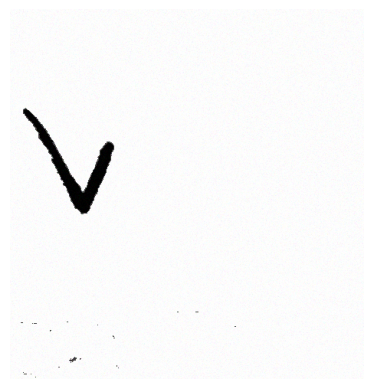

In [ ]:
# 驗證某個增強後的樣本
import matplotlib.pyplot as plt

aug_images = os.listdir(aug_v_path)
sample_aug_image = cv2.imread(os.path.join(aug_v_path, aug_images[0]))
plt.imshow(cv2.cvtColor(sample_aug_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 使用 Keras 的 ImageDataGenerator 從文件夾加載圖片
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    '/content/training_data/train',  # 包括增強的數據
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'
)


Found 18106 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
batch_size = 32
# 讀取原始數據
train_original_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/training_data/train',
    image_size=(180, 180),
    batch_size=batch_size
)

# 讀取增強後數據
train_augmented_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/training_data/augmented',
    image_size=(180, 180),
    batch_size=batch_size
)

# 合併兩個 Dataset
train_dataset = train_original_ds.concatenate(train_augmented_ds)
train_dataset = train_dataset.shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
import os
import shutil

# 定義路徑
original_folder = '/content/training_data/train/v'
augmented_folder = '/content/training_data/augmented/v'

# 確保原始資料夾存在
if not os.path.exists(original_folder):
    os.makedirs(original_folder)

# 複製增強後的檔案到原始資料夾
for filename in os.listdir(augmented_folder):
    source_path = os.path.join(augmented_folder, filename)
    destination_path = os.path.join(original_folder, filename)

    # 如果檔案名稱衝突，可重新命名或覆蓋
    if os.path.exists(destination_path):
        new_name = f"aug_{filename}"  # 添加增強前綴避免覆蓋
        destination_path = os.path.join(original_folder, new_name)

    shutil.copy(source_path, destination_path)

print(f"增強資料已成功合併到: {original_folder}")


增強資料已成功合併到: /content/training_data/train/v


#數據增強


In [ ]:
# 設定資料增強參數
datagen = ImageDataGenerator(
    rotation_range=10,          # 隨機旋轉角度範圍較小，防止數字過於扭曲
    width_shift_range=0.05,     # 輕微的水平平移，避免過多影響數字結構
    height_shift_range=0.05,    # 輕微的垂直平移
    brightness_range=(0.9, 1.1),# 輕微的亮度調整，保留字形的可讀性
    zoom_range=0.1,             # 輕微的縮放，模擬不同手寫壓力的效果
    shear_range=0.1,            # 輕微的剪切變換，使數字略微傾斜
    fill_mode='nearest',        # 填補因旋轉/平移產生的空白
    horizontal_flip=False,      # 禁用水平翻轉，因為羅馬數字的方向性強
    vertical_flip=False         # 禁用垂直翻轉，防止數字顛倒
)


# 讀取影像資料集
train = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/training_data/train',
    labels="inferred",           # 自動從資料夾名稱推測類別
    label_mode="categorical",    # 多類別分類
    class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],  # 類別名稱
    shuffle=True,                # 隨機打亂影像
    seed=123,                    # 設定隨機種子，確保可重現性
    batch_size=8,                # 每批影像數量
    image_size=(32, 32)          # 將影像調整為統一大小
)

# 讀取驗證集資料集（不進行增強）
validation_combine = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/training_data/val',  # Use merged data for validation as well
    labels="inferred",# 自動從資料夾名稱推測類別
    label_mode="categorical",
    class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
    shuffle=True,
    seed=123,
    batch_size=1,
    image_size=(32, 32)
)


Found 9126 files belonging to 10 classes.
Found 963 files belonging to 10 classes.


In [ ]:
# 使用資料增強生成器來訓練
train_alb = datagen.flow_from_directory(
    '/content/training_data/train',
    target_size=(32, 32),
    batch_size=8,
    class_mode='categorical', # 設定標籤類型（如果使用 one-hot 編碼）
    shuffle=True,             # 打亂資料
    seed=123                  # 設定隨機種子
)

Found 9126 images belonging to 10 classes.


In [ ]:
history = model.fit(
    train_alb,  # 使用資料增強的訓練資料
    validation_data=validation_combine,  # 驗證資料集
    epochs=75,  # 設定訓練的周期數
    callbacks=[checkpoint, lr_scheduler],  # 可選擇回調函數來儲存模型和調整學習率
)


Epoch 1/75
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - accuracy: 0.3588 - loss: 3.3356 - val_accuracy: 0.6947 - val_loss: 1.4305 - learning_rate: 1.0000e-07
Epoch 2/75
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.3556 - loss: 3.3551 - val_accuracy: 0.6957 - val_loss: 1.4325 - learning_rate: 1.0000e-07
Epoch 3/75
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 34s 30ms/step - accuracy: 0.3640 - loss: 3.2227 - val_accuracy: 0.6854 - val_loss: 1.4453 - learning_rate: 1.0000e-07
Epoch 4/75
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.3516 - loss: 3.2231 - val_accuracy: 0.6937 - val_loss: 1.4420 - learning_rate: 1.0000e-07
Epoch 5/75
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.3589 - loss: 3.1746 - val_accuracy: 0.6781 - val_loss: 1.5013 - learning_rate: 1.0000e-07
Epoch 6/75
1141/1141 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.3712 - loss: 3.0783 - val_accuracy: 0.6719 - val_loss: 1.4930 - learning_rate: 1.0000e-07
Epoch 7/75
1141/1141 ━━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
#對合併後的資料集進行標籤問題檢測
def dataset_to_numpy_with_indices(dataset):
    images, labels, indices = [], [], []
    for i, (x, y) in enumerate(dataset):
        images.append(x.numpy())
        labels.append(y.numpy())
        indices.append(np.arange(len(y)) + i * len(y))  # Track original indices
    return np.concatenate(images), np.concatenate(labels), np.concatenate(indices)

# 假設你的合併資料集是 train_combine，並將其轉換為 NumPy 格式
X_train, y_train, original_indices = dataset_to_numpy_with_indices(train)

# 使用模型預測來檢測標籤問題
issues = find_label_issues(
    labels=np.argmax(y_train, axis=1),  # 假設使用 one-hot 編碼
    pred_probs=tf.nn.softmax(model.predict(train), axis=1).numpy(),
    return_indices_ranked_by="self_confidence",  # 這是自信度的排名
)

# 提取可能的標籤問題樣本索引
aligned_indices = [original_indices[idx] for idx in issues[:16]]

# 顯示問題的樣本
print(f"Possible label issues (indices): {aligned_indices}")


In [ ]:
# 打印標籤問題的前16個索引
print(f"Top 16 label issue indices (aligned): {aligned_indices}")

# 用於繪製標籤問題的函數
def plot_label_issues_aligned(indices, images, labels, predictions):
    fig, axes = plt.subplots(2, 8, figsize=(8, 8))
    axes = axes.flatten()

    for ax, idx in zip(axes, indices):
        image = images[idx]
        true_label = labels[idx]
        predicted_label = np.argmax(predictions[idx])

        ax.imshow(image.astype("uint8"))
        ax.axis("off")
        ax.set_title(
            f"True: {true_label}\nPred: {predicted_label}",
            fontsize=10,
            color="red" if true_label != predicted_label else "green",
        )

    plt.tight_layout()
    plt.show()

# 取得預測結果
predictions_combine = tf.nn.softmax(model.predict(train), axis=1).numpy()

# 使用合併資料集中的圖像、標籤及預測進行繪製
plot_label_issues_aligned(
    aligned_indices,  # 使用合併資料的標籤問題索引
    X_train,          # 使用合併資料集中的圖像
    np.argmax(y_train, axis=1),  # 使用合併資料集中的標籤
    predictions_combine       # 使用合併資料集中的預測結果
)


In [ ]:
# 計算前%的錯誤標籤
num_errors = len(issues)
top_30_percent = int(num_errors * 0.3)  # 計算 30% 的樣本數量

# 提取錯誤標籤的前30%
aligned_indices_combine = [original_indices[idx] for idx in issues[:top_30_percent]]

# Getting started


The dataset contains ~4400 images of handwritten roman numerals 1-10. **Your task is to optimize model performance by improving the dataset and making training and validation splits.**

You can try fixing incorrect labels, adding data for side case tuning, apply data augmentation techniques, or use any other method to improve the data. You may also find it helpful to take a look at the training script to get a better sense of the model below (these are held fixed). The script will resize all images to `(32, 32)` and run them through a cut off version of ResNet50.

In [ ]:
### DO NOT MODIFY BELOW THIS LINE, THIS IS THE FIXED MODEL ###
tf.keras.backend.clear_session()
batch_size = 8
tf.random.set_seed(2024)

train = tf.keras.preprocessing.image_dataset_from_directory(
        user_data + '/train',
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )

valid = tf.keras.preprocessing.image_dataset_from_directory(
        user_data + '/val',
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
)

total_length = ((train.cardinality() + valid.cardinality()) * batch_size).numpy()

if total_length > 12_000:
    print(f"Dataset size larger than 12,000. Got {total_length} examples")
    sys.exit()

test = tf.keras.preprocessing.image_dataset_from_directory(
        test_data,
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=False,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
)

# Initialize the base model using KerasCV's ResNet50
backbone = keras_cv.models.ResNet50Backbone.from_preset(
    input_shape=(32, 32, 3),
    preset = "resnet50_imagenet",
    load_weights=False,
)

# Create a new model that outputs the desired intermediate layer
base_model = tf.keras.Model(
    inputs=backbone.inputs,
    outputs=backbone.get_layer("v2_stack_0_block3_out").output
)

# Define the input tensor
inputs = tf.keras.Input(shape=(32, 32, 3))

# Pass the preprocessed input through the base model
x = base_model(inputs)

# Add global average pooling
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add a dense layer for classification (assuming 10 classes)
x = tf.keras.layers.Dense(10)(x)

# Define the final model
model = tf.keras.Model(inputs, x)

# Compile the model with appropriate optimizer, loss, and metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# Display the model's architecture
model.summary()

loss_0, acc_0 = model.evaluate(valid)
print(f"loss {loss_0}, acc {acc_0}")

checkpoint = tf.keras.callbacks.ModelCheckpoint(
        "best_model.weights.h5",
        monitor="val_accuracy",
        mode="max",
        save_best_only=True,
        save_weights_only=True,
)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=10, verbose=1, min_lr=1e-7)

'''
history = model.fit(
        train,
        validation_data=valid,
        epochs=75,
        callbacks=[checkpoint, lr_scheduler],
)

model.load_weights("best_model.weights.h5")

loss, acc = model.evaluate(valid)
print(f"final loss {loss}, final acc {acc}")

test_loss, test_acc = model.evaluate(test)
print(f"test loss {test_loss}, test acc {test_acc}")
'''
### DO NOT MODIFY ABOVE THIS LINE, THIS IS THE FIXED MODEL ###

Found 9126 files belonging to 10 classes.
Found 963 files belonging to 10 classes.
Found 52 files belonging to 10 classes.


100%|██████████| 777/777 [00:00<00:00, 1.57MB/s]


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ functional (Functional)              │ (None, 8, 8, 256)           │         228,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 230,858 (901.79 KB)

 Trainable params: 227,914 (890.29 KB)

 Non-trainable params: 2,944 (11.50 KB)

121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1106 - loss: 2.3070
loss 2.309457302093506, acc 0.10176531970500946


'\nhistory = model.fit(\n        train,\n        validation_data=valid,\n        epochs=75,\n        callbacks=[checkpoint, lr_scheduler],\n)\n\nmodel.load_weights("best_model.weights.h5")\n\nloss, acc = model.evaluate(valid)\nprint(f"final loss {loss}, final acc {acc}")\n\ntest_loss, test_acc = model.evaluate(test)\nprint(f"test loss {test_loss}, test acc {test_acc}")\n'

In [ ]:
!pip install scikeras -qq

In [ ]:
predicted_labels=model.predict(train)

1287/1287 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


In [ ]:
all_labels = []  # Initialize an empty list to store labels

for images, labels in train:
  # labels is a tensor containing one-hot encoded labels for the batch
  # Convert labels to class indices (0-9)
  class_indices = np.argmax(labels.numpy(), axis=1)
  all_labels.extend(class_indices)  # Add labels to the list

# Convert the list of labels to a NumPy array
all_labels = np.array(all_labels)

In [ ]:
predicted_labels = np.array(predicted_labels)

In [ ]:
predicted_labels.shape

(10289, 10)

In [ ]:
from scipy.special import softmax

In [ ]:

predicted=softmax(predicted_labels)
trainn_label=np.array(all_labels)
ranked_label_issues=find_label_issues(
    trainn_label,
    predicted,
    return_indices_ranked_by="self_confidence",
)


In [ ]:
len(ranked_label_issues)

7688

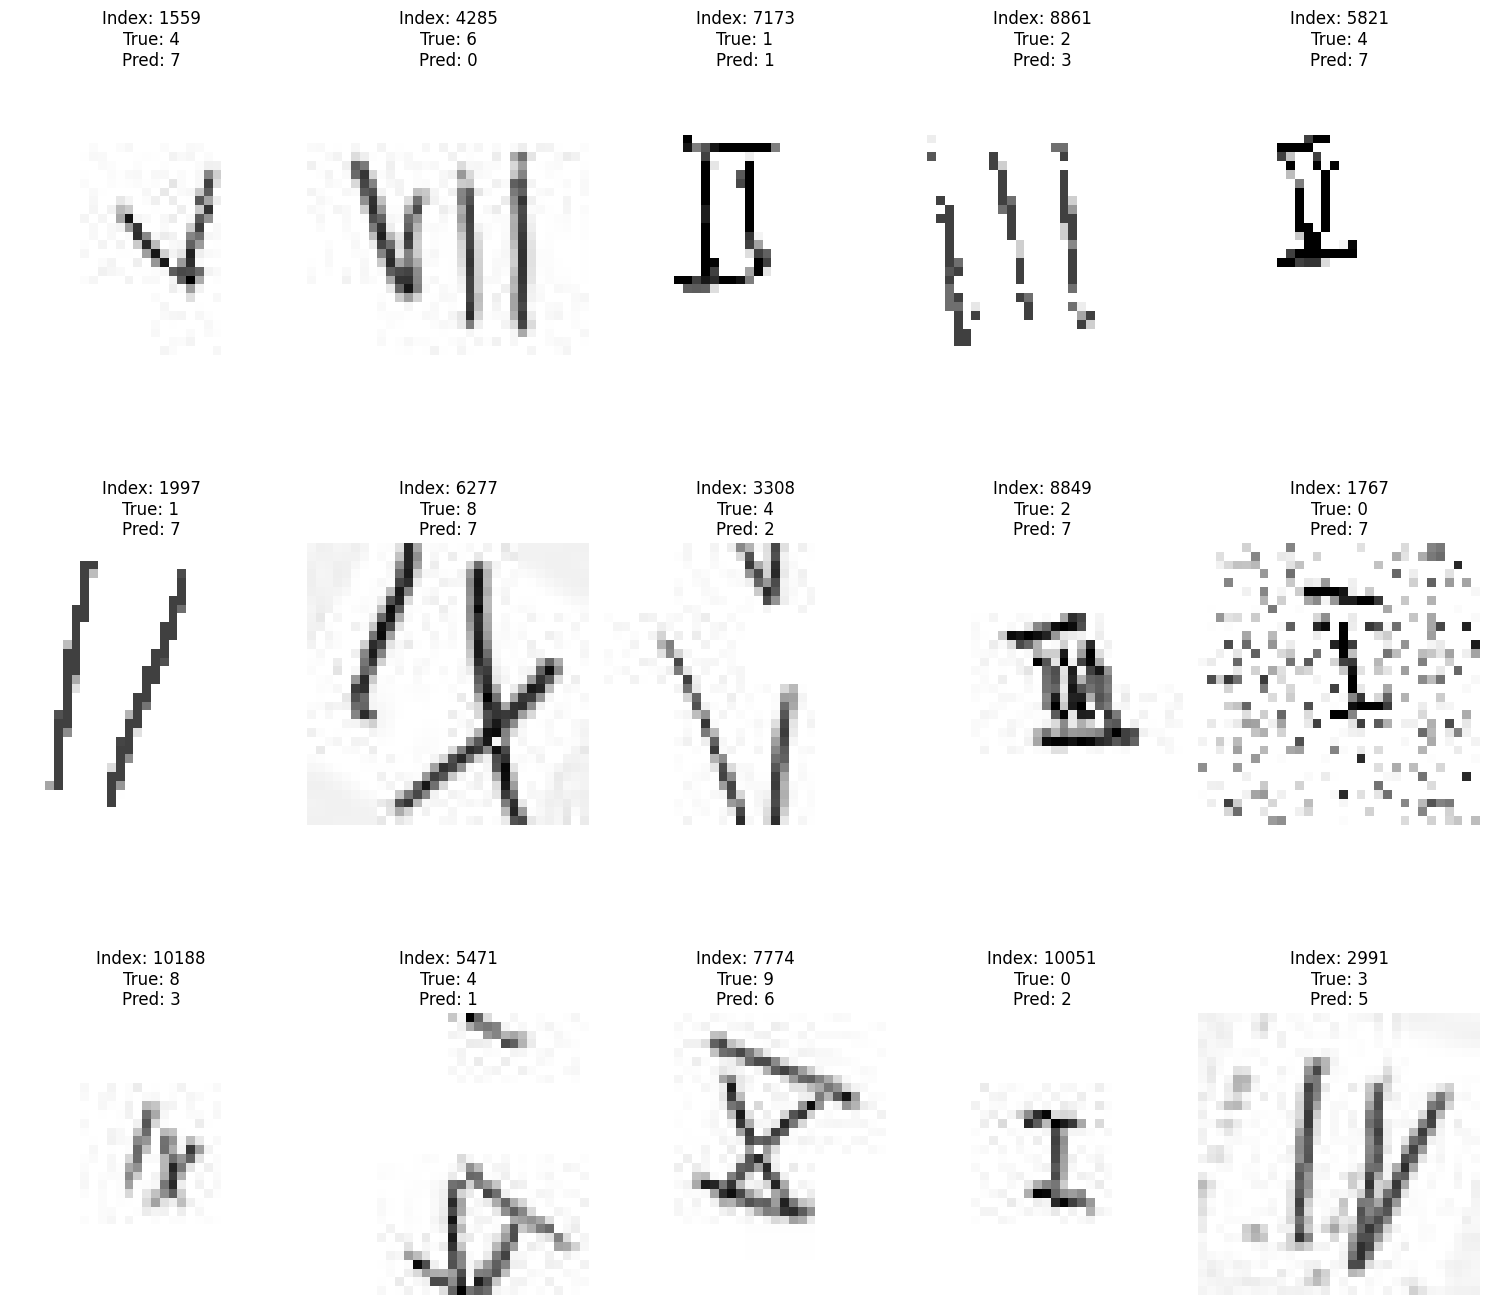

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure you have `ranked_label_issues` from Cleanlab
# ranked_label_issues contains indices of potential label issues ranked by confidence

# Get the first 15 examples
num_examples = 15
example_indices = ranked_label_issues[:num_examples]

# Prepare a dataset iterator to extract images and labels
image_batches = []
label_batches = []

for images, labels in train:
    image_batches.append(images.numpy())
    label_batches.append(labels.numpy())

# Concatenate all batches to get the full dataset in memory
all_images = np.concatenate(image_batches, axis=0)
all_true_labels = np.concatenate(label_batches, axis=0)

# Create the plot
plt.figure(figsize=(15, 15))

for i, idx in enumerate(example_indices[:num_examples]):
    plt.subplot(3, 5, i + 1)  # 3 rows, 5 columns
    plt.imshow(all_images[idx].astype("uint8"))  # Display the image
    true_label = np.argmax(all_true_labels[idx])  # Convert one-hot label to class index
    plt.title(f"Index: {idx}\nTrue: {true_label}\nPred: {np.argmax(predicted[idx])}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
replace_ratio = 0.3
num_issues_to_replace = int(len(ranked_label_issues) * replace_ratio)

# 获取需要替换的样本索引
indices_to_replace = ranked_label_issues[:num_issues_to_replace]

# 替换标签
for idx in indices_to_replace:
    # 获取模型预测的概率最高类别
    predicted_class = np.argmax(predicted[idx])
    # 替换标签
    all_labels[idx] = predicted_class
for idx in indices_to_replace[:5]:
    print(f"Index {idx}: New Label = {all_labels[idx]}")

Index 1559: New Label = 7
Index 4285: New Label = 0
Index 7173: New Label = 1
Index 8861: New Label = 3
Index 5821: New Label = 7


## Make your submission

Remember that the evaluation metric is Macro F1 score, you may want to also evaluate the above results using the Macro F1 score before submission.

In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory+"testing_data",
    shuffle = False,
    image_size=(32, 32),
    batch_size=1)

prob = model.predict(test_dataset)
predictions = []
for i in range(0, prob.shape[0]):
    predictions.append(np.argmax(prob[i,:])+1)

Found 500 files belonging to 1 classes.
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
import pandas as pd

paths = test_dataset.file_paths

Ids = []
for x in paths:
    Ids.append(x.split("/")[-1])

df = pd.DataFrame()
df["Id"] = Ids
df["Predicted"] = predictions
df.to_csv("submission.csv", index=False)